In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로
core_cpi_path = '/FEDRATE PROJECT/CPILFESL (1).csv'
cpi_path = '/FEDRATE PROJECT/CPIAUCSL.csv'
fed_funds_path = '/FEDRATE PROJECT/FEDFUNDS (2).csv'

# 데이터 불러오기
core_cpi_df = pd.read_csv(core_cpi_path)
cpi_df = pd.read_csv(cpi_path)
fed_funds_df = pd.read_csv(fed_funds_path)

# 날짜 형식 변환 및 데이터 병합 준비
core_cpi_df['DATE'] = pd.to_datetime(core_cpi_df['DATE'])
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
fed_funds_df['DATE'] = pd.to_datetime(fed_funds_df['DATE'])

# 데이터 병합
merged_df = core_cpi_df.merge(cpi_df, on='DATE', suffixes=('_core', '_cpi'))
merged_df = merged_df.merge(fed_funds_df, on='DATE')

# 컬럼명 정리
merged_df.columns = ['DATE', 'CORE_CPI', 'CPI', 'FED_FUNDS']

# 독립 변수와 종속 변수 설정
X = merged_df[['CORE_CPI', 'CPI']]
y = merged_df['FED_FUNDS']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 피팅
model = sm.OLS(y, X).fit()

# 예측값 계산
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% 신뢰 구간

# 예측값, 하한값, 상한값
pred_mean = pred_summary['mean']
pred_mean_se = pred_summary['mean_se']

# 표준편차의 +-2 범위 계산
ci_lower_std = pred_mean - 2 * pred_mean_se
ci_upper_std = pred_mean + 2 * pred_mean_se

# 결과 데이터프레임 생성
result = pd.DataFrame({
    'DATE': merged_df['DATE'],
    'Observed': y,
    'Predicted': pred_mean,
    'CI Lower (Std)': ci_lower_std,
    'CI Upper (Std)': ci_upper_std
})

import ace_tools as tools; tools.display_dataframe_to_user(name="Prediction Results with Standard Deviation Range", dataframe=result)

# 그래프 시각화
plt.figure(figsize=(12, 8))
plt.plot(result['DATE'], result['Observed'], 'o', label='Observed')
plt.plot(result['DATE'], result['Predicted'], 'r-', label='Predicted')
plt.fill_between(result['DATE'], result['CI Lower (Std)'], result['CI Upper (Std)'], color='gray', alpha=0.2, label='Standard Deviation Range (±2)')
plt.xlabel('Date')
plt.ylabel('Federal Funds Rate')
plt.title('Federal Funds Rate Prediction with Core CPI and CPI (Standard Deviation Range ±2)')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/FEDRATE PROJECT/CPILFESL (1).csv'

         DATE  CORE_CPI_LAG6  CPI_LAG12  FED_FUNDS
12 2010-01-01        219.263    211.933       0.11
13 2010-02-01        219.496    212.705       0.13
14 2010-03-01        219.920    212.495       0.16
15 2010-04-01        220.501    212.709       0.20
16 2010-05-01        220.666    213.022       0.20
                                DATE  CORE_CPI_LAG6   CPI_LAG12   FED_FUNDS
count                            174     174.000000  174.000000  174.000000
mean   2017-03-16 23:51:43.448275968     252.986609  245.468753    1.100747
min              2010-01-01 00:00:00     219.263000  211.933000    0.050000
25%              2013-08-08 18:00:00     232.625250  230.192250    0.090000
50%              2017-03-16 12:00:00     248.992000  238.536000    0.180000
75%              2020-10-24 06:00:00     266.975500  256.354000    1.572500
max              2024-06-01 00:00:00     313.209000  304.003000    5.330000
std                              NaN      25.516654   22.969929    1.596659
          

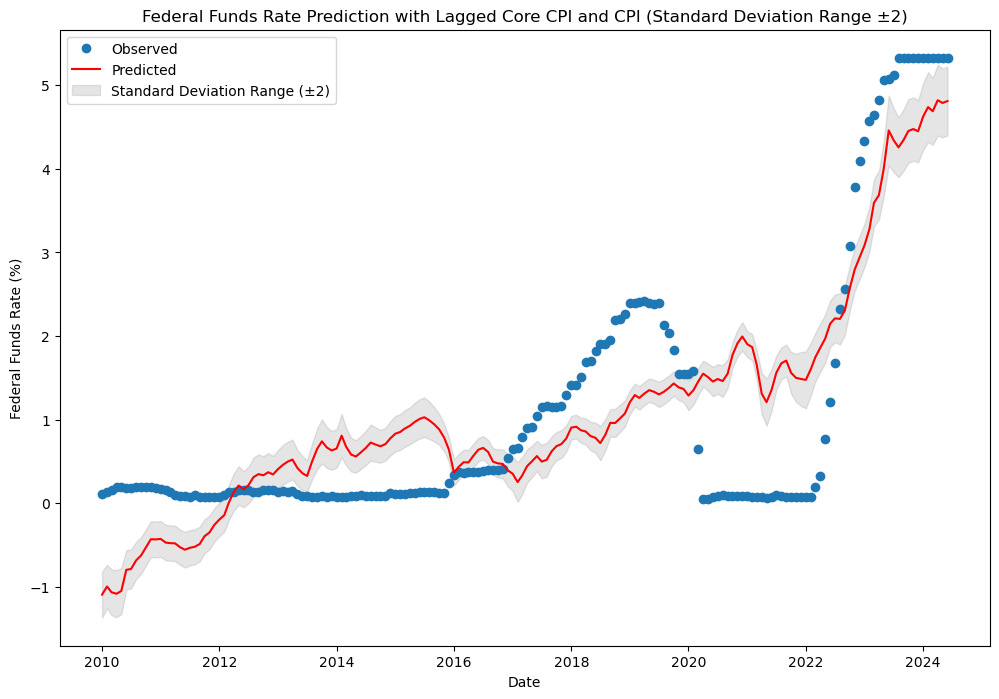

In [6]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 파일 경로
core_cpi_path = r'C:\Users\per3i\FEDRATE\CPILFESL.csv'
cpi_path = r'C:\Users\per3i\FEDRATE\CPIAUCSL.csv'
fed_funds_path = r'C:\Users\per3i\FEDRATE\FEDFUNDS.csv'

# 데이터 불러오기
core_cpi_df = pd.read_csv(core_cpi_path)
cpi_df = pd.read_csv(cpi_path)
fed_funds_df = pd.read_csv(fed_funds_path)

# 날짜 형식 변환
core_cpi_df['DATE'] = pd.to_datetime(core_cpi_df['DATE'])
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
fed_funds_df['DATE'] = pd.to_datetime(fed_funds_df['DATE'])

# 시차 적용
core_cpi_df['CORE_CPI_LAG6'] = core_cpi_df['CPILFESL'].shift(6)
cpi_df['CPI_LAG12'] = cpi_df['CPIAUCSL'].shift(12)

# 데이터 병합
merged_df = core_cpi_df[['DATE', 'CORE_CPI_LAG6']].merge(cpi_df[['DATE', 'CPI_LAG12']], on='DATE')
merged_df = merged_df.merge(fed_funds_df, on='DATE')

# 결측값 제거 (시차로 인해 생긴 NaN)
merged_df = merged_df.dropna()

# 컬럼명 정리
merged_df.columns = ['DATE', 'CORE_CPI_LAG6', 'CPI_LAG12', 'FED_FUNDS']

# 데이터 확인
print(merged_df.head())
print(merged_df.describe())

# 독립 변수와 종속 변수 설정
X = merged_df[['CORE_CPI_LAG6', 'CPI_LAG12']]
y = merged_df['FED_FUNDS']

# 상수항 추가
X = sm.add_constant(X)

# 회귀 모델 피팅
model = sm.OLS(y, X).fit()

# 모델 요약 출력
print(model.summary())

# 예측값 계산
predictions = model.get_prediction(X)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% 신뢰 구간

# 예측값, 하한값, 상한값
pred_mean = pred_summary['mean']
pred_mean_se = pred_summary['mean_se']

# 표준편차의 +-2 범위 계산
ci_lower_std = pred_mean - 2 * pred_mean_se
ci_upper_std = pred_mean + 2 * pred_mean_se

# 결과 데이터프레임 생성
result = pd.DataFrame({
    'DATE': merged_df['DATE'],
    'Observed': y,
    'Predicted': pred_mean,
    'CI Lower (Std)': ci_lower_std,
    'CI Upper (Std)': ci_upper_std,
    'Std Dev': pred_mean_se  # 표준편차 추가
})

# 결과 데이터프레임 출력
print(result.head())

# 그래프 시각화 및 저장
plt.figure(figsize=(12, 8))
plt.plot(result['DATE'], result['Observed'], 'o', label='Observed')
plt.plot(result['DATE'], result['Predicted'], 'r-', label='Predicted')
plt.fill_between(result['DATE'], result['CI Lower (Std)'], result['CI Upper (Std)'], color='gray', alpha=0.2, label='Standard Deviation Range (±2)')
plt.xlabel('Date')
plt.ylabel('Federal Funds Rate (%)')
plt.title('Federal Funds Rate Prediction with Lagged Core CPI and CPI (Standard Deviation Range ±2)')
plt.legend()

# 그래프를 파일로 저장
plt.savefig(r'C:\Users\per3i\FEDRATE\fed_funds_rate_prediction_lagged.png')

# 그래프 표시
plt.show()
